In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dalmatian

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield, j3d, lf3d
from mhsflex.vis import plot
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt


rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 20.0  # Mm
ymin = 0.0
ymax = 20.0
zmin = 0.0
zmax = 20.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 2
deltaz = 0.2

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix] / 10.0
        y = y_arr[iy] / 10.0
        data_bz[iy, ix] = dalmatian(x, y) * B_PHOTO

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [34]:
folder = "/Users/lilli/Desktop/Thesis/R2_multipol"

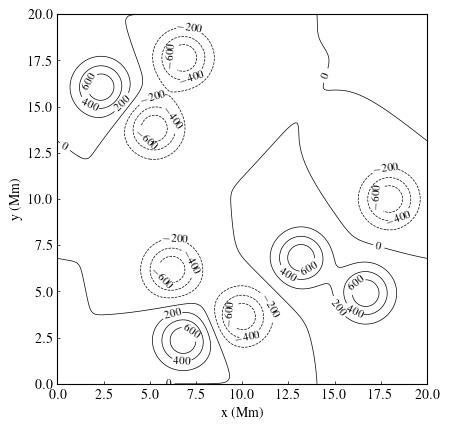

In [5]:
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data2d.bz,
    #levels = np.array((-700, -400, -200, -100, 0, 100, 200, 400, 700)),
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/contour.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

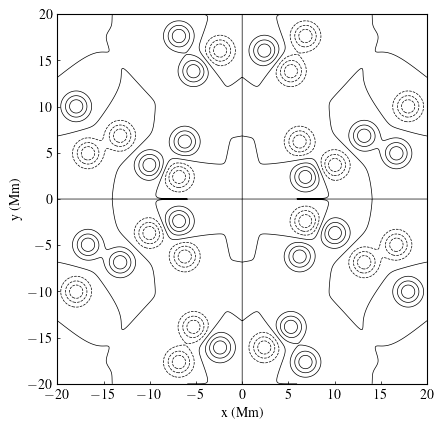

In [6]:
from mhsflex.b3d import mirror

data_bz_see = mirror(data_bz)

x_arr2 = np.arange(2 * nresol_x) * (2 * xmax) / (2 * nresol_x - 1) - xmax
y_arr2 = np.arange(2 * nresol_y) * (2 * ymax) / (2 * nresol_y - 1) - ymax

x_grid2, y_grid2 = np.meshgrid(x_arr2, y_arr2)

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid2,
    y_grid2,
    data_bz_see,
    #levels = np.array((-700, -400, -200, -100, 0, 100, 200, 400, 700)),
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
#ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/contour2.png"
plt.savefig(plotname, dpi=200, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [5]:
b = 1.0

alphapot = 0.0
alpha = 0.05

alff = 0.0
amhs1 = 0.22
amhs2 = 0.44

In [6]:
data3d_p = calculate_magfield(data2d, alff, b, alphapot, z0, deltaz)

In [7]:
data3d_lff = calculate_magfield(data2d, alff, b, alpha, z0, deltaz)

In [8]:
data3d_mhs1 = calculate_magfield(data2d, amhs1, b, alpha, z0, deltaz)

In [9]:
data3d_mhs2 = calculate_magfield(data2d, amhs2, b, alpha, z0, deltaz)

In [12]:
from mhsflex.field2d import check_fluxbalance

In [13]:
check_fluxbalance(data2d)

-0.11962456550445917

In [26]:
from mhsflex.vis import detect_footpoints
from msat.pyvis.fieldline3d import fieldline3d

In [27]:
sinks, sources = detect_footpoints(data3d_lff)

In [28]:
xmin, xmax, ymin, ymax, zmin, zmax = (
        data2d.x[0],
        data2d.x[-1],
        data2d.y[0],
        data2d.y[-1],
        data2d.z[0],
        data2d.z[-1],
    )

boxedges = np.zeros((2, 3))
boxedges[0, 0] = ymin
boxedges[1, 0] = ymax
boxedges[0, 1] = xmin
boxedges[1, 1] = xmax
boxedges[0, 2] = zmin
boxedges[1, 2] = zmax  # 2 * data.z0  # FOR ZOOM

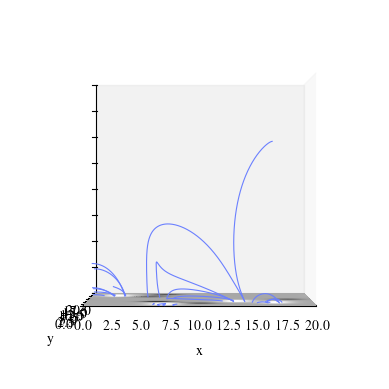

In [32]:
x_big = np.arange(2.0 * data2d.nx) * 2.0 * xmax / (2.0 * data2d.nx - 1) - xmax
y_big = np.arange(2.0 * data2d.ny) * 2.0 * ymax / (2.0 * data2d.ny - 1) - ymax
fig = plt.figure()
ax = fig.figure.add_subplot(111, projection="3d")
x_grid, y_grid = np.meshgrid(x_big, y_big)
ax.contourf(
    x_grid[data2d.ny : 2 * data2d.ny, data2d.nx : 2 * data2d.nx],
    y_grid[data2d.ny : 2 * data2d.ny, data2d.nx : 2 * data2d.nx],
    data2d.bz,
    1000,
    cmap=cmap,
    offset=0.0,
)

ax.set_xlabel("x")
ax.set_ylabel("y")

for ix in range(0, data2d.nx, int(data2d.nx / 20)):
        for iy in range(0, data2d.ny, int(data2d.ny / 20)):
            if sources[iy, ix] != 0 or sinks[iy, ix] != 0:
                if data2d.bz[iy, ix] > 0:

                    x_start = ix / (data3d_lff.nx / xmax)
                    y_start = iy / (data3d_lff.ny / ymax)
                    # ax.scatter(x_start, y_start, c=c2, s=0.8, facecolors='none')


                    ystart = [y_start, x_start, 0.0]
        # Fieldline3D expects startpt, BField, Row values, Column values so we need to give Y first, then X

        # Get fieldline coordinates for reference model
                    fieldline_lff = fieldline3d(
                        ystart,
                        data3d_lff.field,
                        data3d_lff.y,
                        data3d_lff.x,
                        z_arr,
                        1.0 / 100.0,
                        0.0,
                        1.0,
                        1.0e-8,
                        oneway=False,
                        boxedge=boxedges,
                        gridcoord=False,
                        coordsystem="cartesian",
                    )

#         # # Get fieldline coordinates for reconstruction model
#         fieldline_rec = fieldline3d(
#             ystart,
#             data3dLFF.field,
#             data3d.y,
#             data3d.x,
#             z_arr,
#             h1_rec,
#             hmin,
#             hmax,
#             eps,
#             oneway=False,
#             boxedge=boxedges,
#             gridcoord=False,
#             coordsystem="cartesian",
#         )

#         fieldline_rec2 = fieldline3d(
#             ystart,
#             data3d.field,
#             data3d.y,
#             data3d.x,
#             z_arr,
#             h1_rec,
#             hmin,
#             hmax,
#             eps,
#             oneway=False,
#             boxedge=boxedges,
#             gridcoord=False,
#             coordsystem="cartesian",
#         )

                    ax.plot(
                        fieldline_lff[:, 1],
                        fieldline_lff[:, 0],
                        fieldline_lff[:, 2],
                        color=c2,
                        linewidth=0.8,
                        zorder=4000,
                    )

#         ax.plot(
#             fieldline_rec[:, 1],
#             fieldline_rec[:, 0],
#             fieldline_rec[:, 2],
#             color=c1,
#             linewidth=0.8,
#             zorder=4000,
#         )

#         ax.plot(
#             fieldline_rec2[:, 1],
#             fieldline_rec2[:, 0],
#             fieldline_rec2[:, 2],
#             color=c7,
#             linewidth=0.8,
#             zorder=4000,
#         )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")  # type: ignore
ax.grid(False)
ax.set_zlim(zmin, zmax)  # type: ignore
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_box_aspect((xmax-xmin, ymax-ymin, zmax))

ax.view_init(0, -90)  # type: ignore

ax.set_zticklabels([])  # type: ignore
ax.set_zlabel("")  # type: ignore

[t.set_va("center") for t in ax.get_yticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_yticklabels()]  # type: ignore

[t.set_va("center") for t in ax.get_xticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_xticklabels()]  # type: ignore

plotname = folder + "/fieldline_comp.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

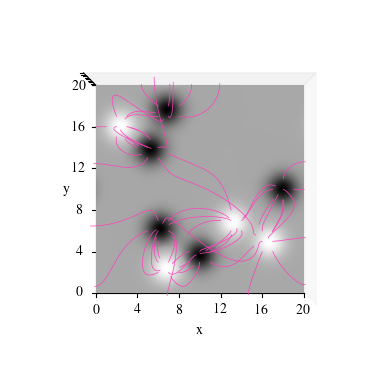

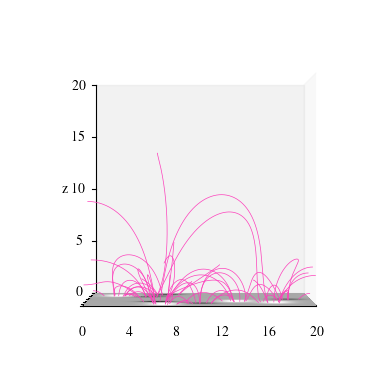

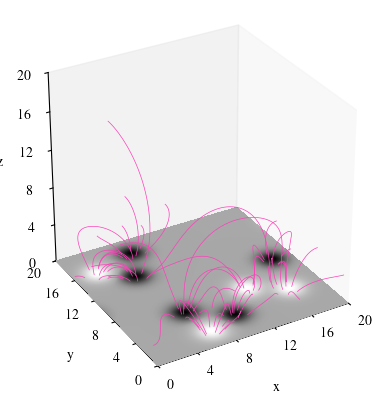

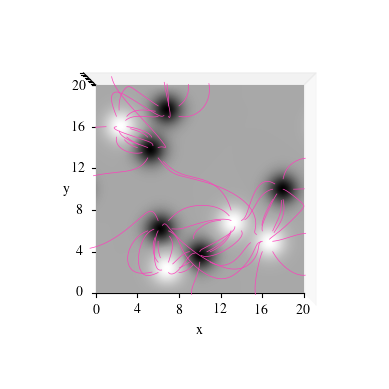

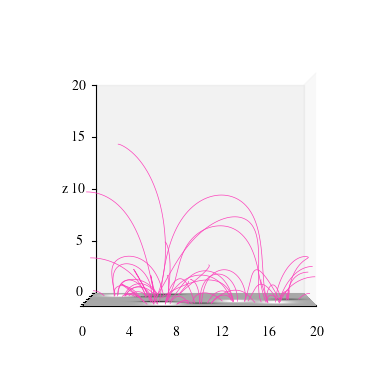

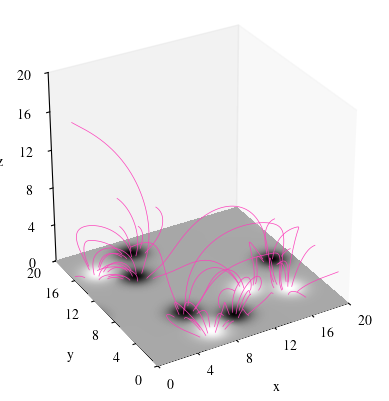

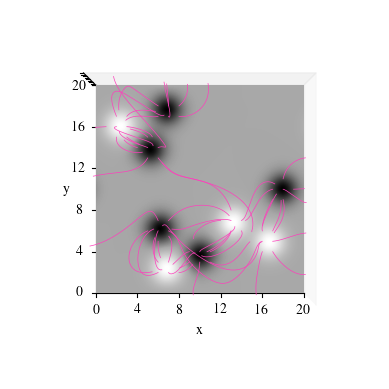

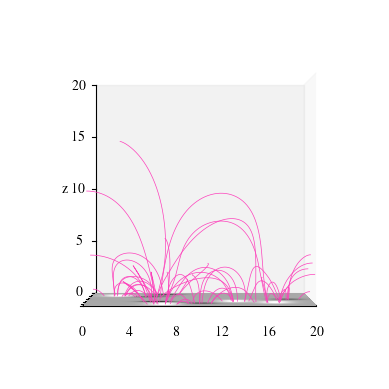

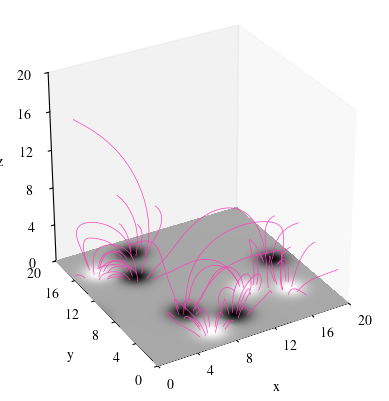

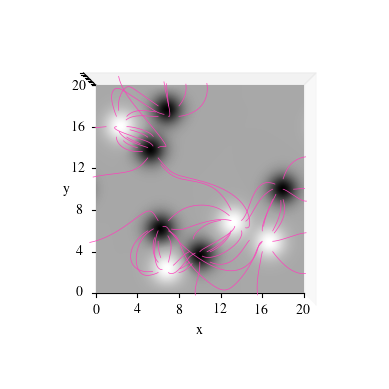

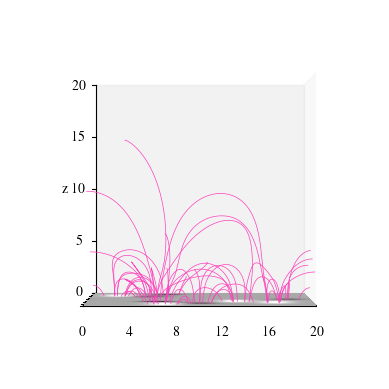

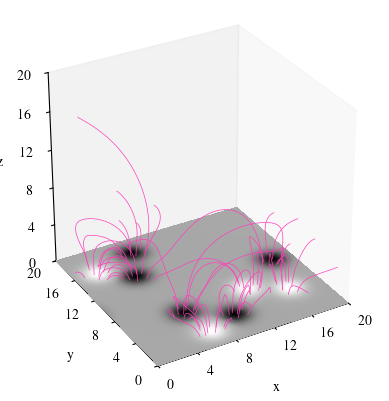

In [35]:
plot(data3d_p, "los", False, True, path=folder)
plot(data3d_p, "side", False, True, path=folder)
plot(data3d_p, "angular", False, True, path=folder)

plot(data3d_lff, "los", False, True, path=folder)
plot(data3d_lff, "side", False, True, path=folder)
plot(data3d_lff, "angular", False, True, path=folder)

plot(data3d_mhs1, "los", False, True, path=folder)
plot(data3d_mhs1, "side", False, True, path=folder)
plot(data3d_mhs1, "angular", False, True, path=folder)

plot(data3d_mhs2, "los", False, True, path=folder)
plot(data3d_mhs2, "side", False, True, path=folder)
plot(data3d_mhs2, "angular", False, True, path=folder)

In [14]:
ix_max = np.unravel_index(data3d_mhs1.bz.argmax(), data3d_mhs1.bz.shape)[1]
iy_max = np.unravel_index(data3d_mhs1.bz.argmax(), data3d_mhs1.bz.shape)[0]

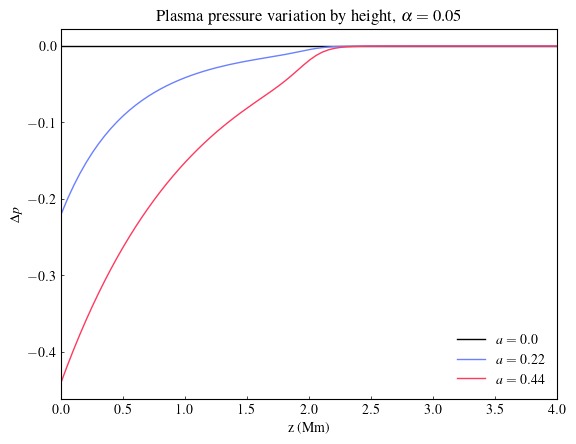

In [15]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    data3d_lff.dpressure[iy_max, ix_max, :],
    linewidth=1.0,
    color=c3,
    label=r"$a = 0.0$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1.dpressure[iy_max, ix_max, :],
    linewidth=1.0,
    color=c2,
    label=r"$a = 0.22$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.dpressure[iy_max, ix_max, :],
    linewidth=1.0,
    linestyle="solid",
    color=c4,
    label=r"$a = 0.44$",
)


ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma pressure variation by height, $\alpha =$ " + str(alpha)
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\Delta p$")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/dpressure.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

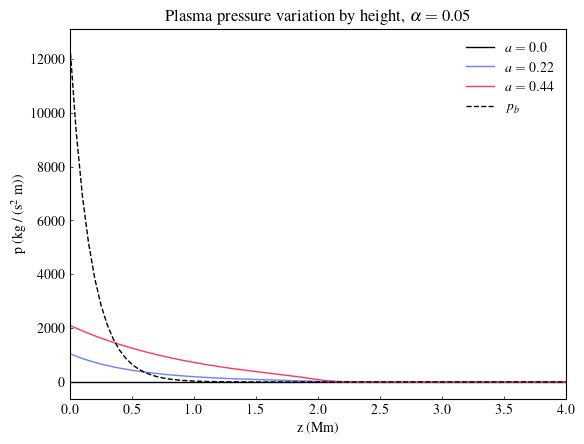

In [16]:
T_PHOTOSPHERE = 5600.0  # Photospheric temperature
T_CORONA = 2.0 * 10.0**6  # Coronal temperature

G_SOLAR = 272.2  # m/s^2
KB = 1.380649 * 10**-23  # Boltzmann constant in Joule/ Kelvin = kg m^2/(Ks^2)
MBAR = 1.67262 * 10**-27  # mean molecular weight (proton mass)
RHO0 = 2.7 * 10**-4  # plasma density at z = 0 in kg/(m^3)
P0 = T_PHOTOSPHERE * KB * RHO0 / MBAR  # plasma pressure in kg/(s^2 m)
MU0 = 1.25663706 * 10**-6  # permeability of free space in mkg/(s^2A^2)

B0 = data2d.bz.max()  # in Gauss
PB0 = (B0 * 10**-4) ** 2 / (
            2 * MU0
        )  # magnetic pressure b0**2 / 2mu0 in kg/(s^2m)
BETA0 = P0 / PB0  # Plasma Beta, ration plasma to magnetic pressure

fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    abs(data3d_lff.dpressure[iy_max, ix_max, :]) * (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    color=c3,
    label=r"$a = 0.0$",
)
ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs1.dpressure[iy_max, ix_max, :])* (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    color=c2,
    label=r"$a = 0.22$",
)
ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs2.dpressure[iy_max, ix_max, :])* (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    linestyle="solid",
    color=c4,
    label=r"$a = 0.44$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.bpressure * BETA0 / 2.0* (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    linestyle="dashed",
    color=c3,
    label=r"$p_b$",
)




ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma pressure variation by height, $\alpha =$ " + str(alpha)
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"p (kg / ($\textrm{s}^2$ m))")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/dpressure_with_background.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

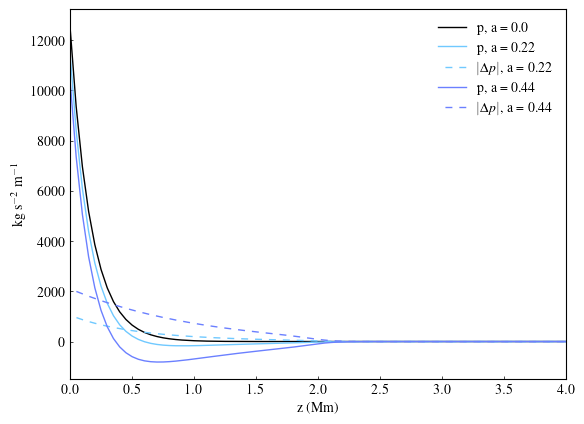

In [33]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    data3d_lff.fpressure[iy_max, ix_max, :] * (B0 * 10**-4) ** 2.0 / MU0,
    linewidth=1.0,
    color=c3,
    label=r"p, a = 0.0",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1.fpressure[iy_max, ix_max, :] * (B0 * 10**-4) ** 2.0 / MU0,
    linewidth=1.0,
    color=c1,
    label=r"p, a = 0.22",
)

ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs1.dpressure[iy_max, ix_max, :])* (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    color=c1,
    linestyle=(5, (5,5)),
    label=r"$ | \Delta p|$, a = 0.22",
)

ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.fpressure[iy_max, ix_max, :] * (B0 * 10**-4) ** 2.0 / MU0,
    linewidth=1.0,
    linestyle="solid",
    color=c2,
    label=r"p, a = 0.44",
)

ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs2.dpressure[iy_max, ix_max, :])* (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    color=c2,
    linestyle=(5, (5,5)),
    label=r"$ | \Delta p|$, a = 0.44",
)


ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"kg s$^{-2}$ m$^{-1}$")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/fpressure.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

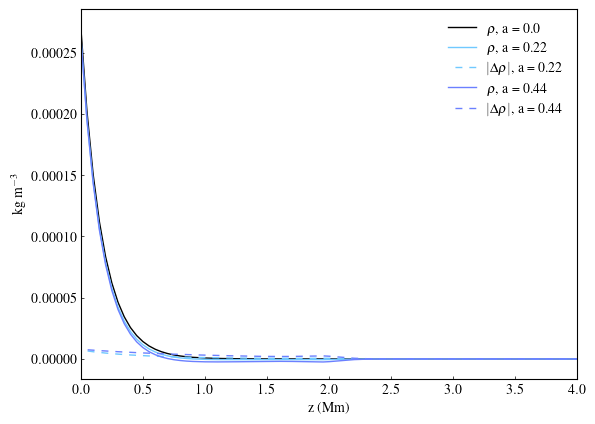

In [37]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    data3d_lff.fdensity[iy_max, ix_max, :] * (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L ),
    linewidth=1.0,
    color=c3,
    label=r"$\rho$, a = 0.0",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1.fdensity[iy_max, ix_max, :] * (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L ),
    linewidth=1.0,
    color=c1,
    label=r"$\rho$, a = 0.22",
)

ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs1.ddensity[iy_max, ix_max, :])* (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L ),
    linewidth=1.0,
    color=c1,
    linestyle=(5, (5,5)),
    label=r"$ | \Delta \rho|$, a = 0.22",
)

ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.fdensity[iy_max, ix_max, :]* (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L ),
    linewidth=1.0,
    linestyle="solid",
    color=c2,
    label=r"$\rho$, a = 0.44",
)

ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs2.ddensity[iy_max, ix_max, :])* (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L ),
    linewidth=1.0,
    color=c2,
    linestyle=(5, (5,5)),
    label=r"$ | \Delta \rho|$, a = 0.44",
)


ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"kg m$^{-3}$")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/fdensity.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

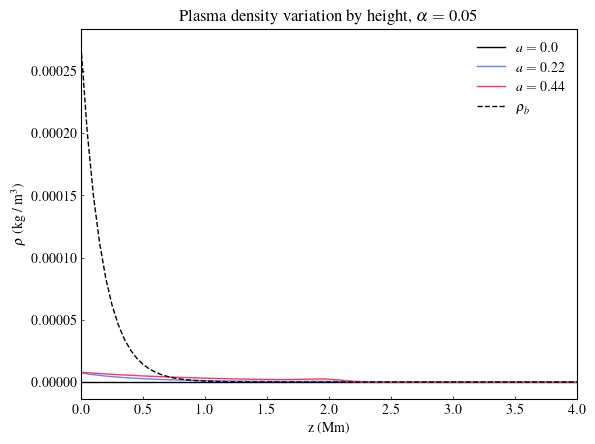

In [18]:
T0 = (T_PHOTOSPHERE + T_CORONA * np.tanh(z0 /deltaz)) / (
            1.0 + np.tanh(z0 / deltaz)
        )
L = 10**6 
H = KB * T0 / (MBAR * G_SOLAR * L) 

fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    abs(data3d_lff.ddensity[iy_max, ix_max, :])* (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L ),
    linewidth=1.0,
    color=c3,
    label=r"$a = 0.0$",
)
ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs1.ddensity[iy_max, ix_max, :])* (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L),
    linewidth=1.0,
    color=c2,
    label=r"$a = 0.22$",
)
ax1.plot(
    data3d_mhs1.z,
    abs(data3d_mhs2.ddensity[iy_max, ix_max, :])* (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L),
    linewidth=1.0,
    linestyle="solid",
    color=c4,
    label=r"$a = 0.44$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.bdensity * BETA0 / (2.0 * H) * T0 / T_PHOTOSPHERE * (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L),
    linewidth=1.0,
    linestyle="dashed",
    color=c3,
    label=r"$\rho_b$",
)


ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma density variation by height, $\alpha =$ " + str(alpha)
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\rho$ (kg / $\textrm{m}^3$)")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/ddensity_with_background.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

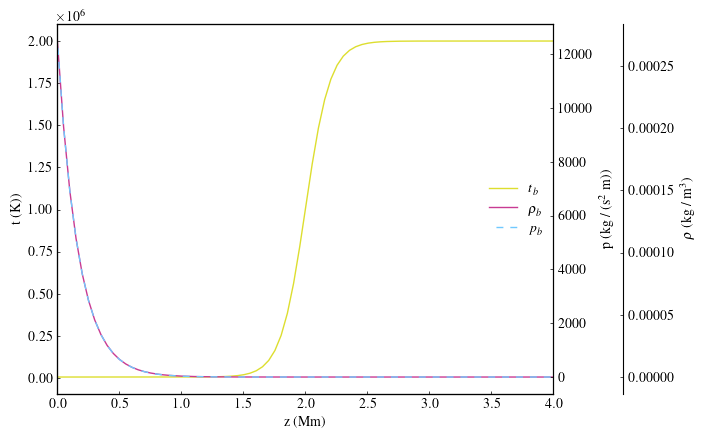

In [19]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.btemp,
    linewidth=1.0,
    color=c8,
    label=r"$t_b$",
)
ax2.plot(
    data3d_mhs1.z,
    data3d_mhs2.bdensity * BETA0 / (2.0 * H) * T0 / T_PHOTOSPHERE * (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L),
    linewidth=1.0,
    color=c5,
    label=r"$\rho_b$",
)
ax3.plot(
    data3d_mhs1.z,
    data3d_mhs2.bpressure * BETA0 / 2.0* (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    linestyle=(5, (5, 5)),
    color=c1,
    label=r"$p_b$",
)

ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])

ax1.tick_params(direction="in", length=2, width=0.5)
ax2.tick_params(direction="in", length=2, width=0.5)
ax3.tick_params(direction="in", length=2, width=0.5)
ax2.spines["right"].set_position(("outward", 50))
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines = lines1 + lines2 + lines3
labels = labels1 + labels2 + labels3
ax2.set_ylabel(r"$\rho$ (kg / $\textrm{m}^3$)")
ax3.set_ylabel(r"p (kg / ($\textrm{s}^2$ m))")
ax1.set_ylabel(r"t (K))")
plt.legend(lines, labels, frameon=False, loc=5)
plotname = folder  + "/background.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_7267/1769865310.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


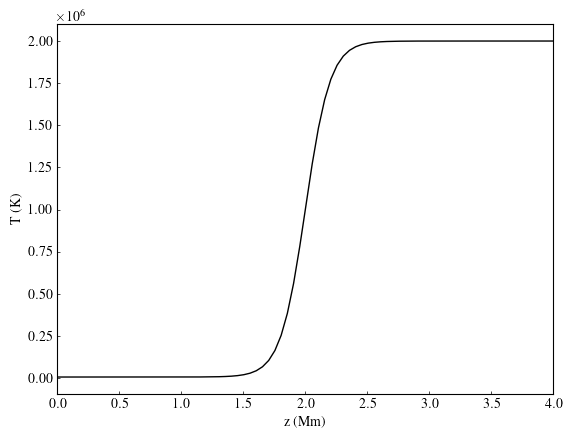

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_7267/1769865310.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


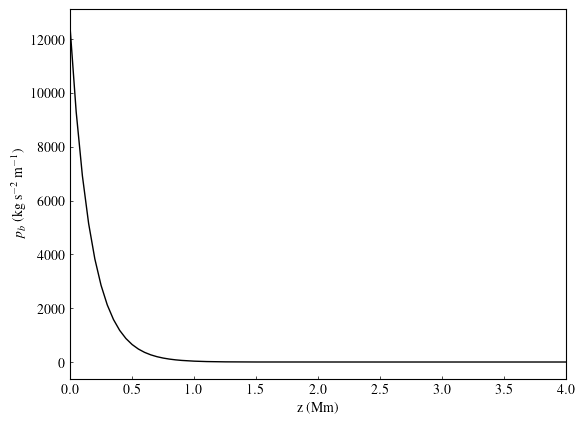

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_7267/1769865310.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


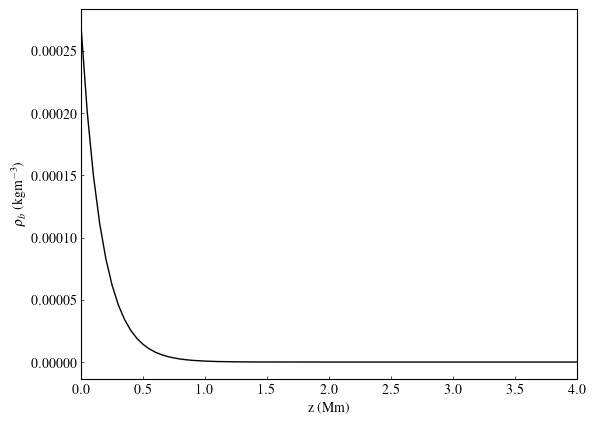

In [21]:
plt.plot(
    z_arr,
    data3d_mhs2.btemp,
    linewidth=1.0,
    color=c3,
)
#plt.ylabel(r"kg/($\textrm{s}^2$ m)")
plt.ylabel(r"T (K)")
plt.xlabel("z (Mm)")
plt.xlim([0, 4.0])
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/btemp.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

plt.plot(
    z_arr,
    data3d_mhs2.bpressure * BETA0 / 2.0* (B0 * 10**-4)**2 / MU0,
    linewidth=1.0,
    color=c3,
)
plt.ylabel(r"$p_b$ (kg s$^{-2}$ m$^{-1}$)")
plt.xlabel("z (Mm)")
plt.xlim([0, 4.0])
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/bpres.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

plt.plot(
    z_arr,
    data3d_mhs2.bdensity * BETA0 / (2.0 * H) * T0 / T_PHOTOSPHERE * (B0 * 10**-4)**2 / (MU0 * G_SOLAR * L),
    linewidth=1.0,
    color=c3,
)
plt.ylabel(r"$\rho_b$ (kgm$^{-3}$)")
plt.xlabel("z (Mm)")
plt.xlim([0, 4.0])
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/bden.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

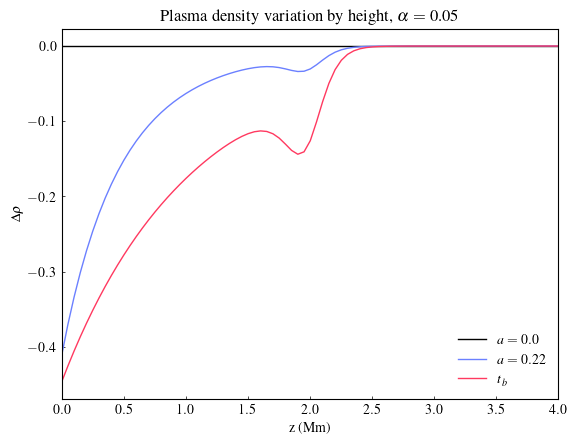

In [82]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    data3d_lff.ddensity[iy_max, ix_max, :],
    linewidth=1.0,
    color=c3,
    label=r"$a = 0.0$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1.ddensity[iy_max, ix_max, :],
    linewidth=1.0,
    color=c2,
    label=r"$a = 0.22$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.ddensity[iy_max, ix_max, :],
    linewidth=1.0,
    linestyle="solid",
    color=c4,
    label=r"$t_b$",
)


ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma density variation by height, $\alpha =$ " + str(alpha)
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\Delta \rho$")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/ddensity.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

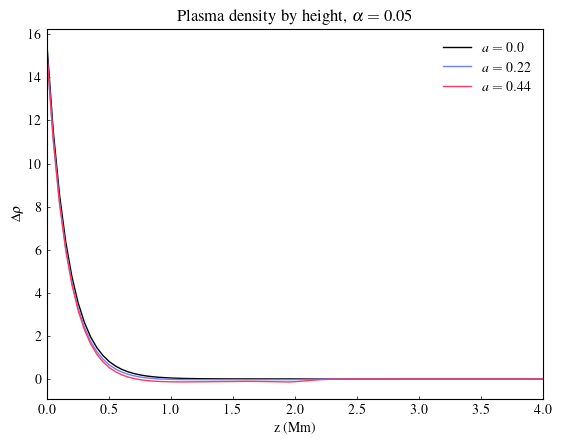

In [83]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    data3d_lff.fdensity[iy_max, ix_max, :],
    linewidth=1.0,
    color=c3,
    label=r"$a = 0.0$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1.fdensity[iy_max, ix_max, :],
    linewidth=1.0,
    color=c2,
    label=r"$a = 0.22$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.fdensity[iy_max, ix_max, :],
    linewidth=1.0,
    linestyle="solid",
    color=c4,
    label=r"$a = 0.44$",
)


ax1.set_xlabel("z (Mm)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma density by height, $\alpha =$ " + str(alpha)
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\Delta \rho$")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/fdensity.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [34]:
iz_photo = 0
z_photo = 0.0

iz_z0half = int(nresol_z / 20.0)
z_z0half = z0 / 2.0

iz_z0 = int(nresol_z / 10.0)
z_z0 = z0

iz_2z0 = int(2 * nresol_z / 10.0)
z_2z0 = 2 * z0

In [35]:
ErrormapP = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-FF8C2E
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c1),
    ),
)

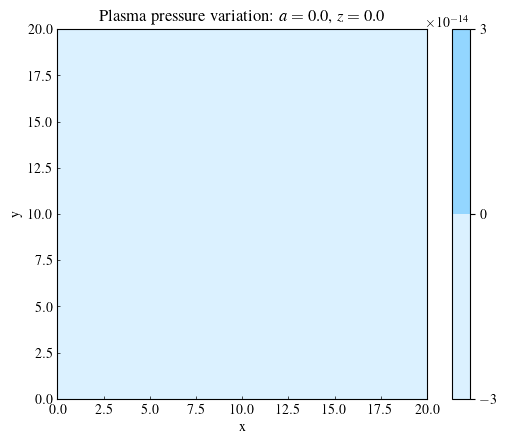

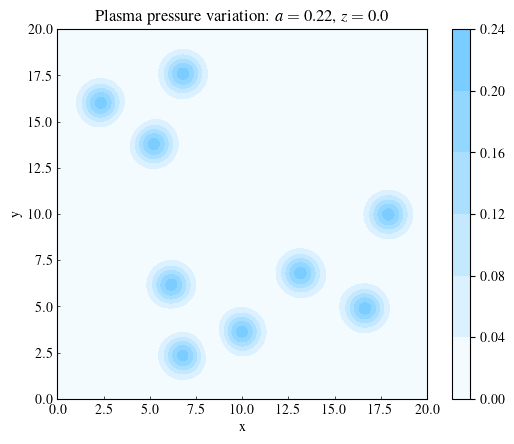

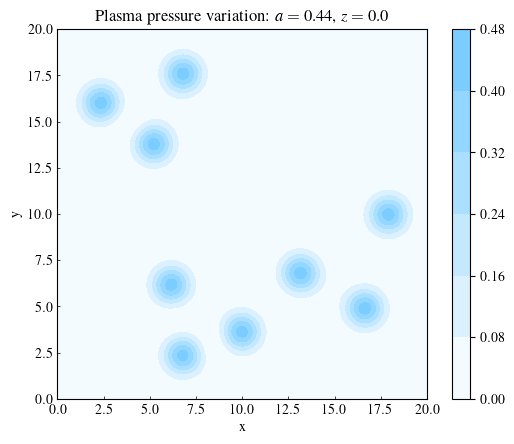

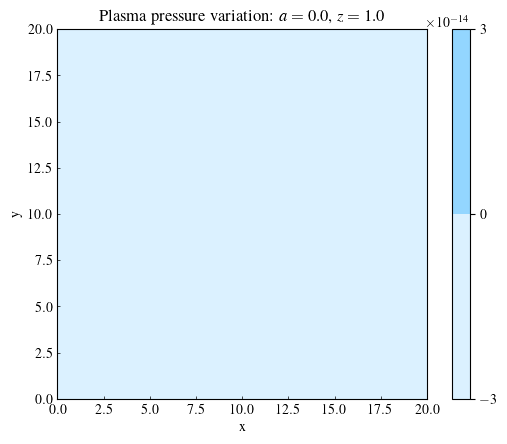

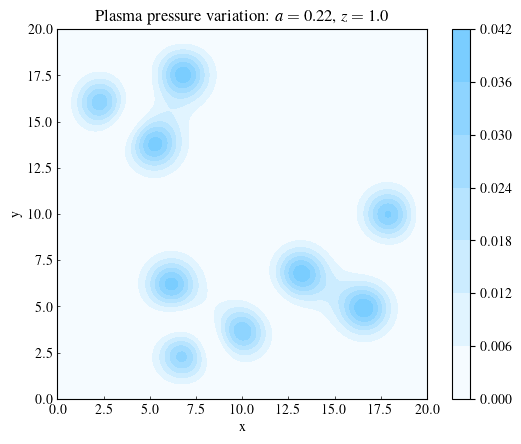

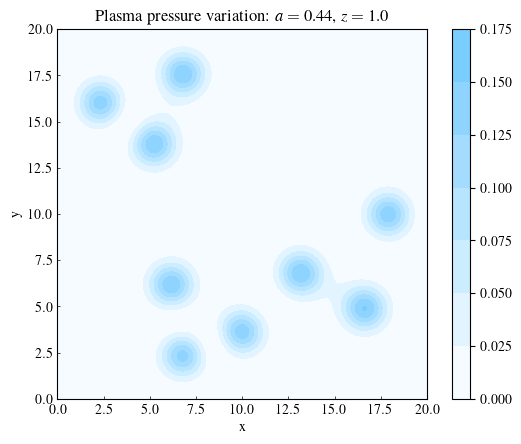

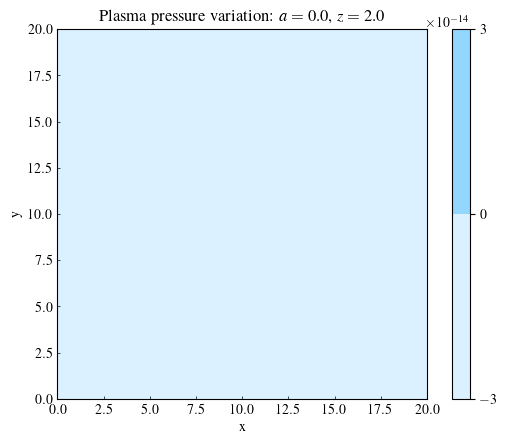

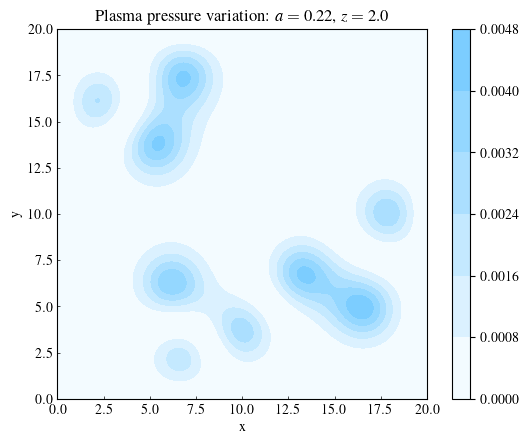

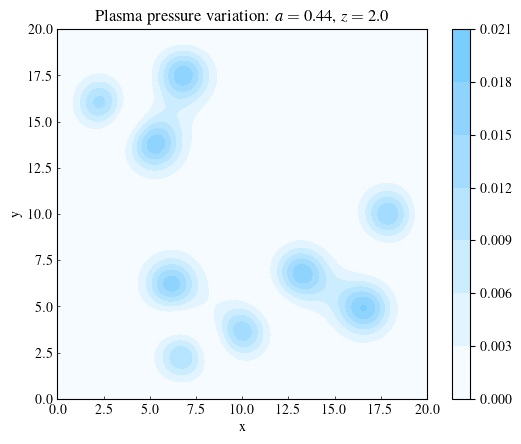

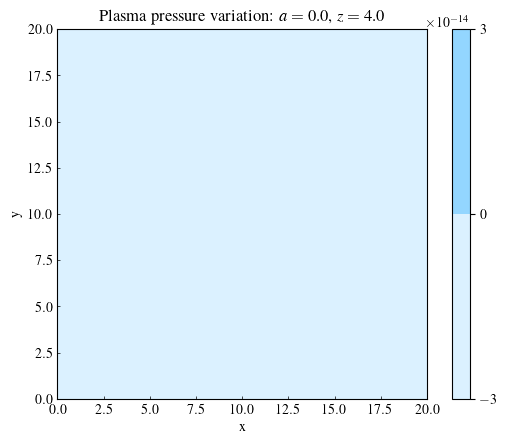

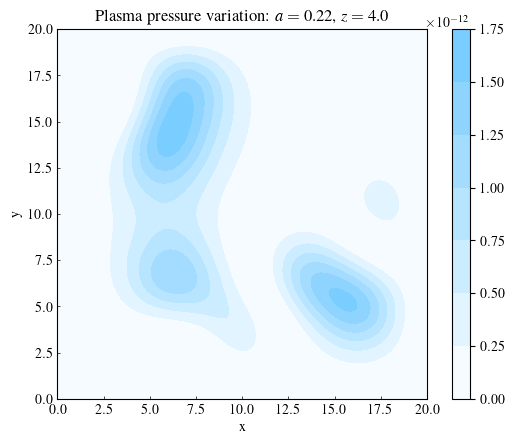

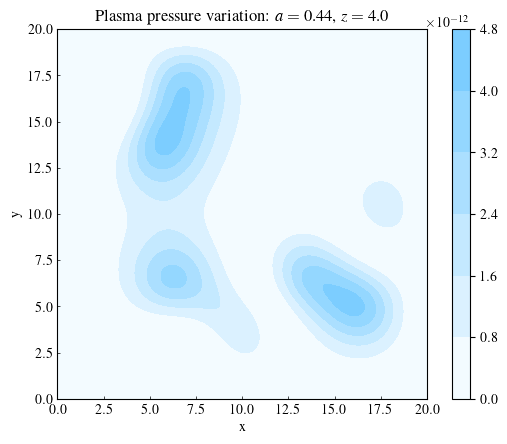

In [41]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3d_lff.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma pressure variation: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/dpsurf_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3d_mhs1.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma pressure variation: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/dpsurf_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3d_mhs2.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma pressure variation: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/dpsurf_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [39]:
ErrormapD = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-6ED1F6
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c5),
    ),
)

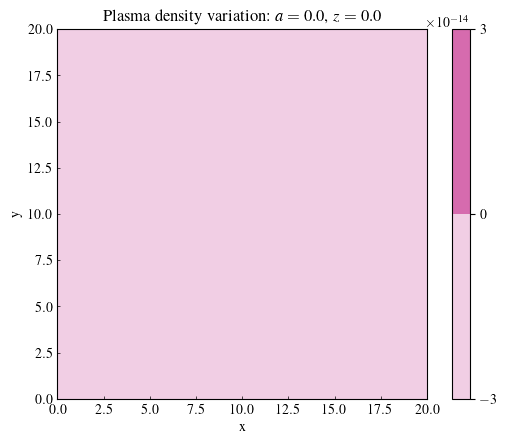

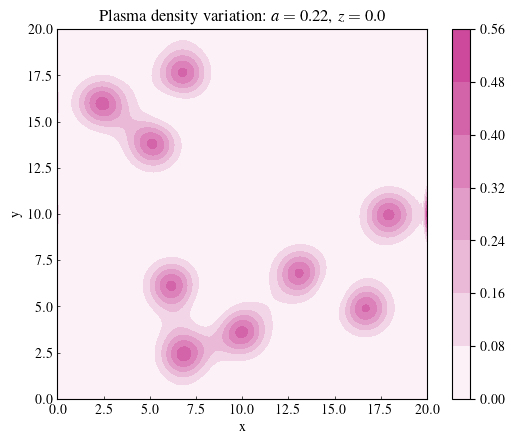

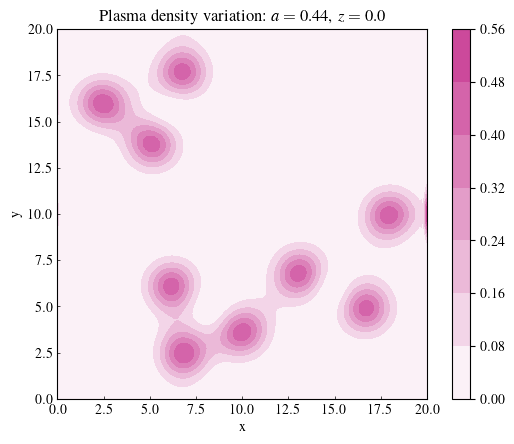

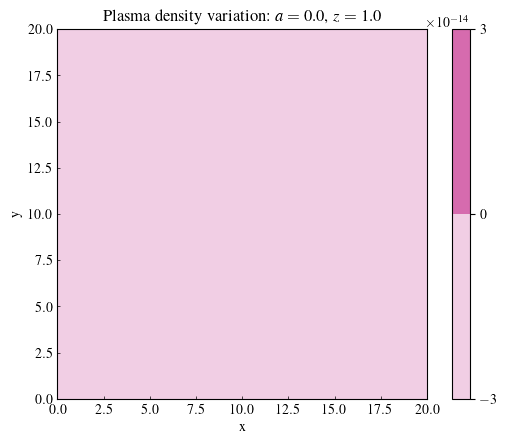

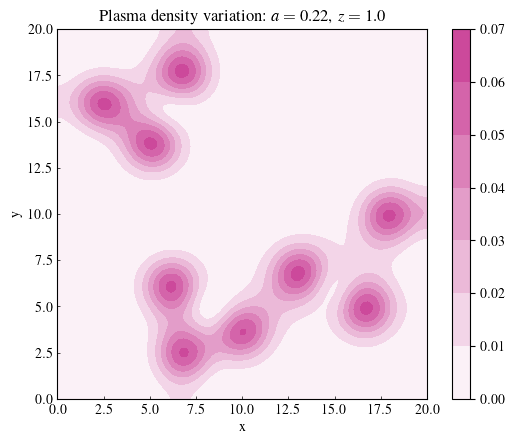

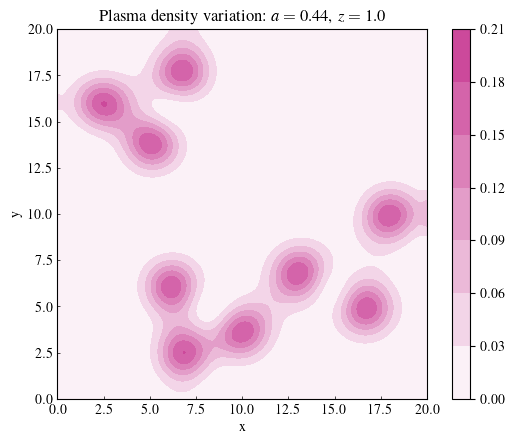

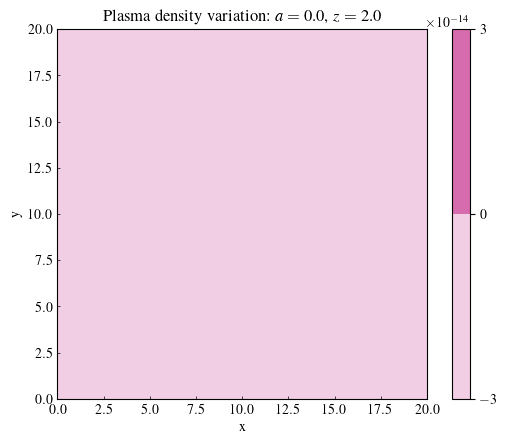

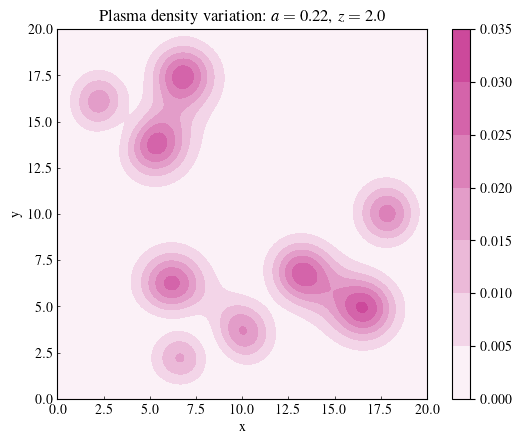

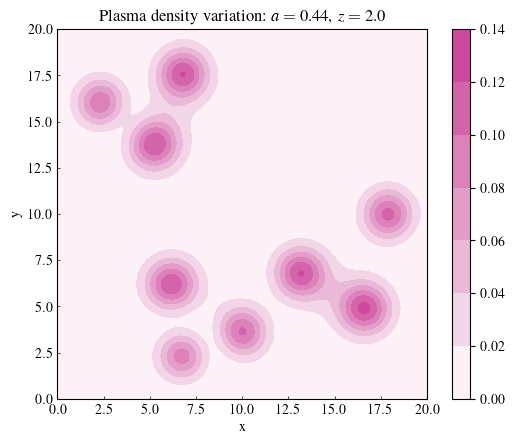

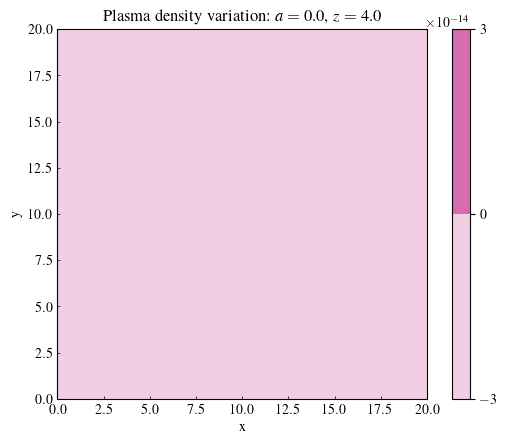

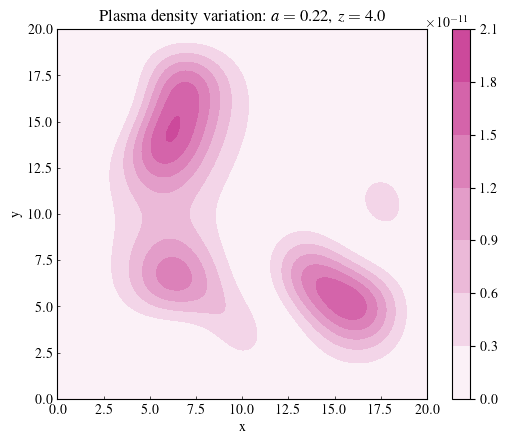

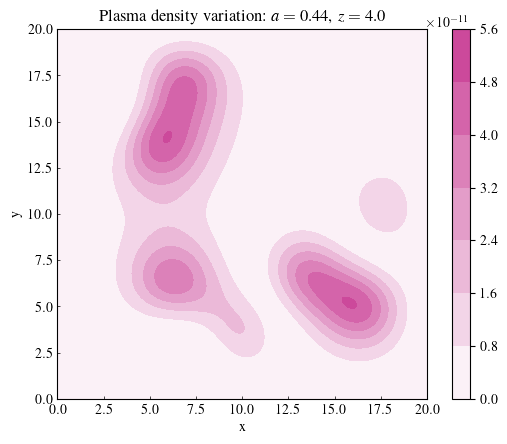

In [42]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3d_lff.ddensity[:, :, iiz]),
        6,
        cmap=ErrormapD,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma density variation: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/ddsurf_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3d_mhs1.ddensity[:, :, iiz]),
        6,
        cmap=ErrormapD,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma density variation: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/ddsurf_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3d_mhs2.ddensity[:, :, iiz]),
        6,
        cmap=ErrormapD,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma density variation: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/ddsurf_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [43]:
ErrormapJ = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-F1535C
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c8),
    ),
)

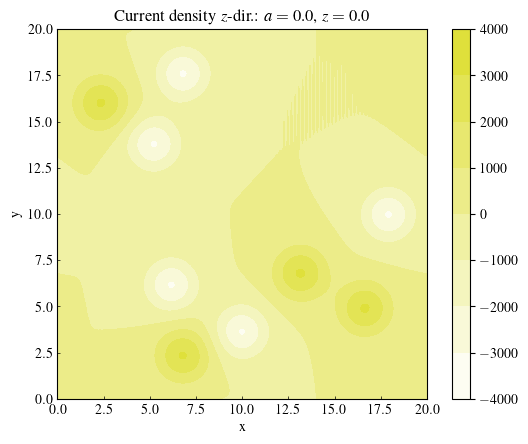

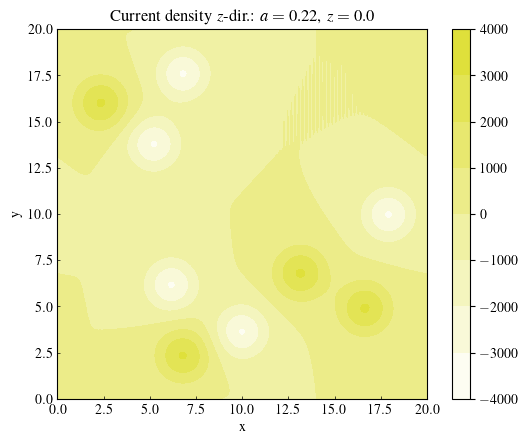

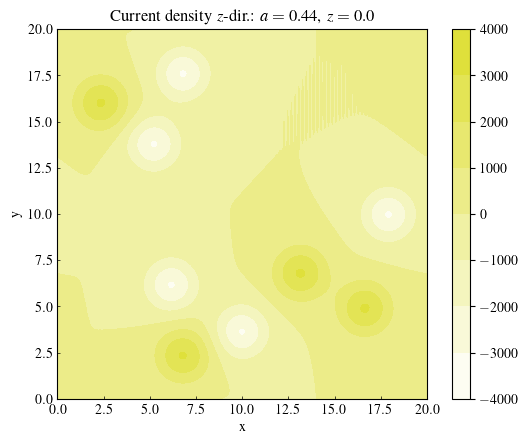

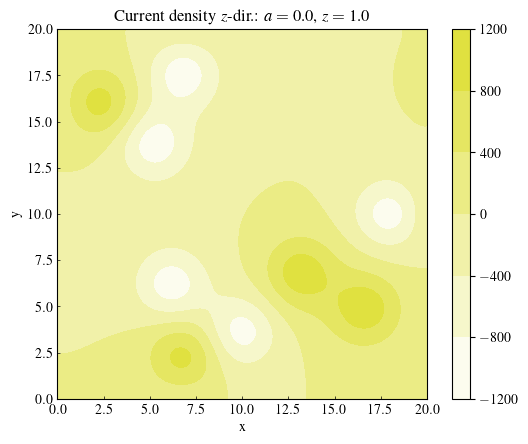

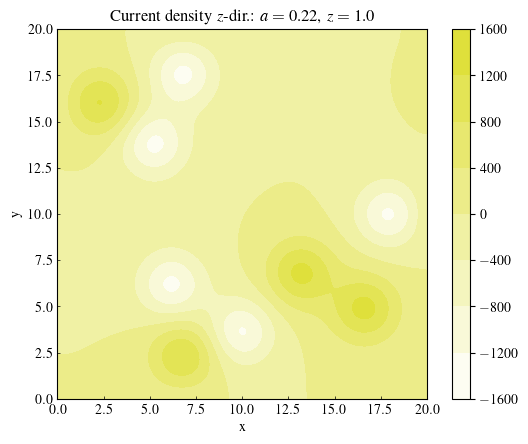

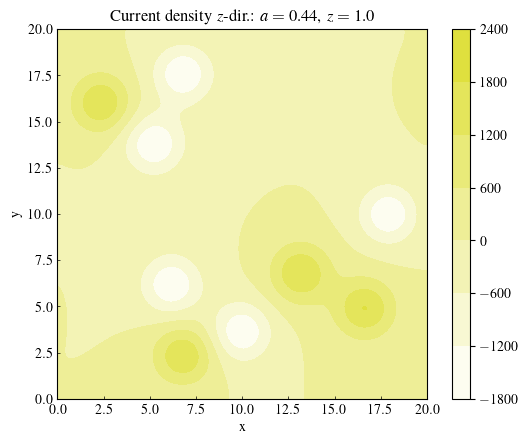

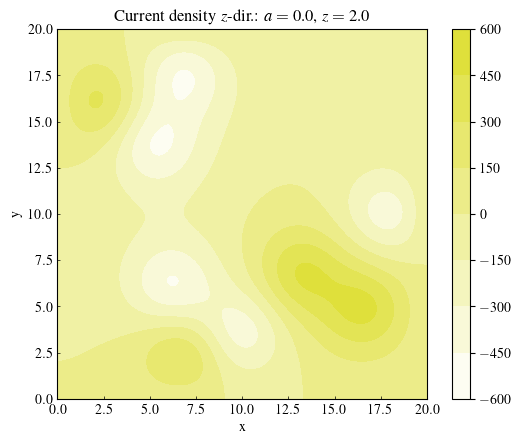

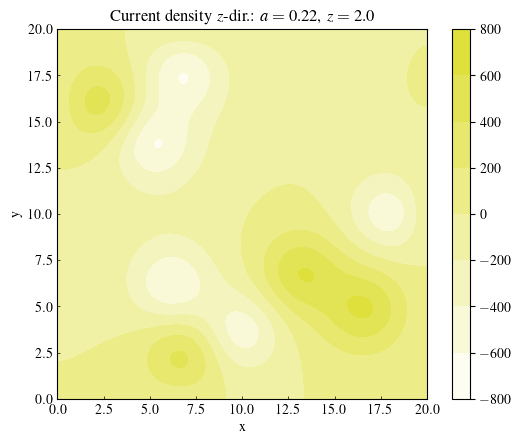

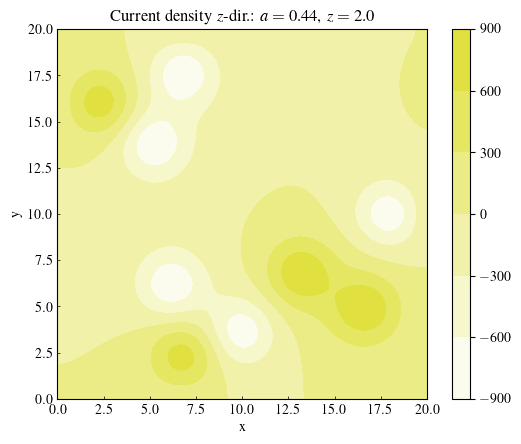

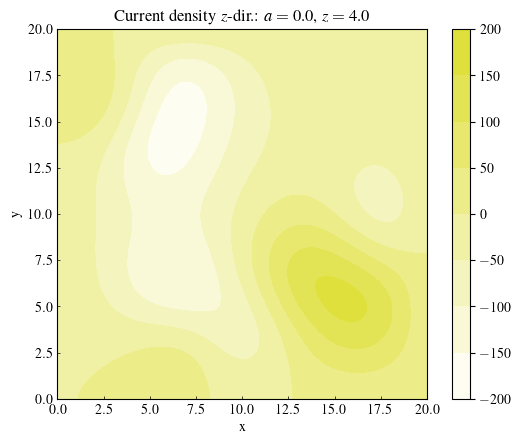

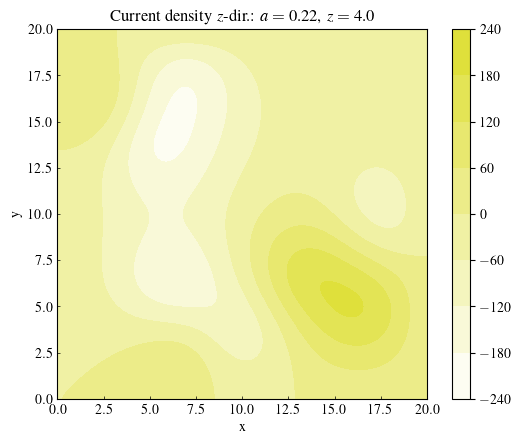

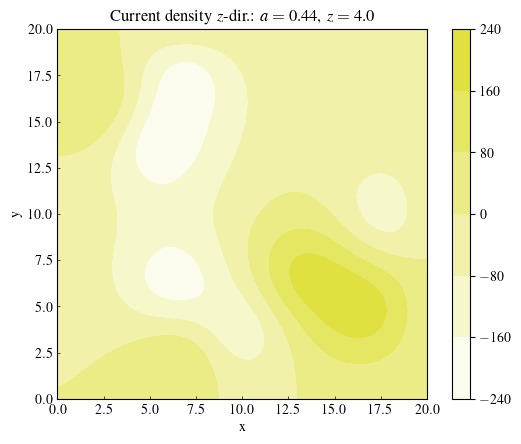

In [55]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_lff.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $z$-dir.: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jz_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs1.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $z$-dir.: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jz_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs2.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $z$-dir.: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jz_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

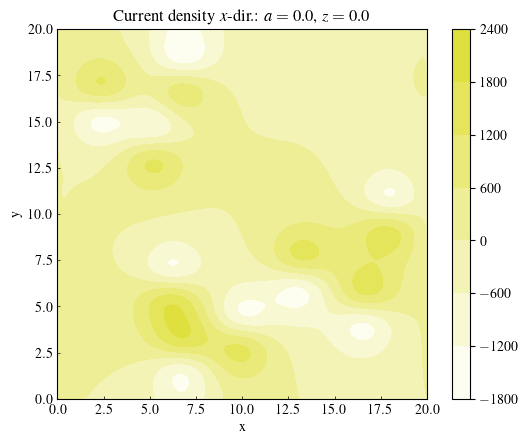

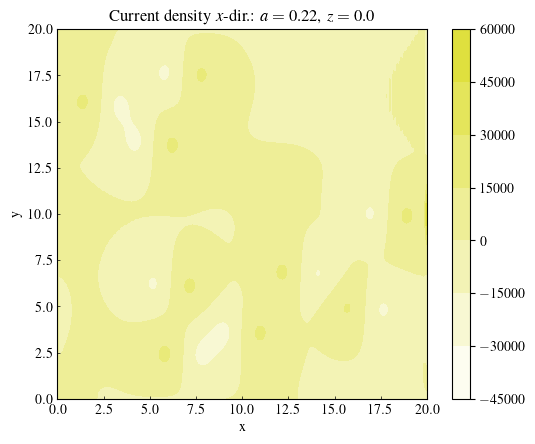

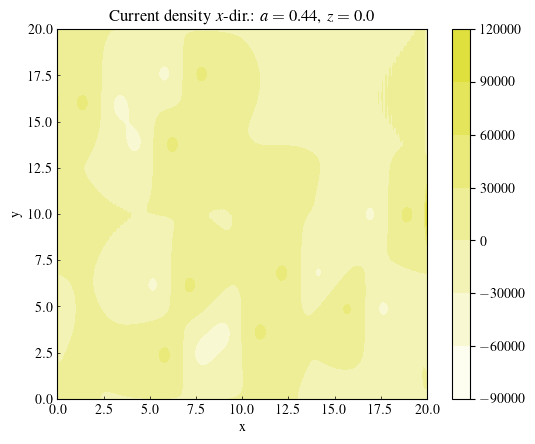

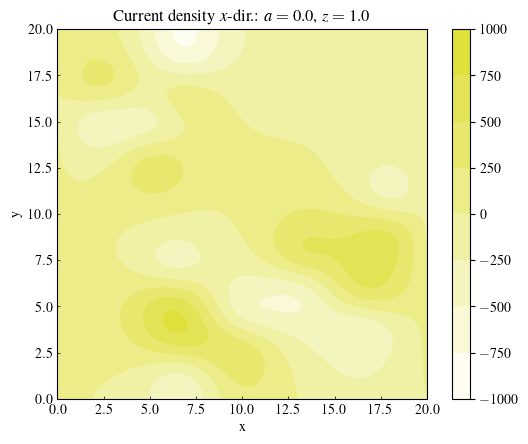

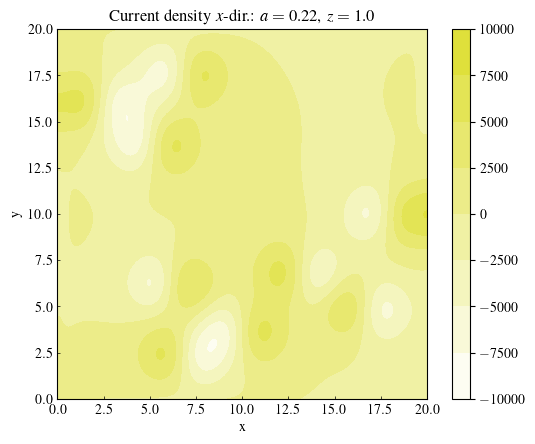

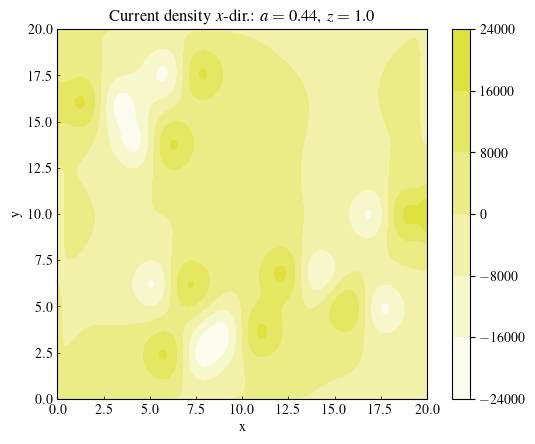

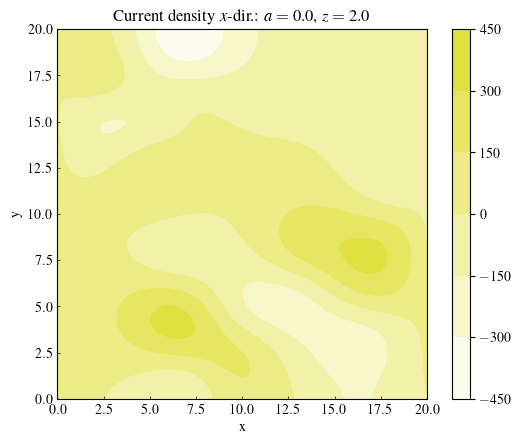

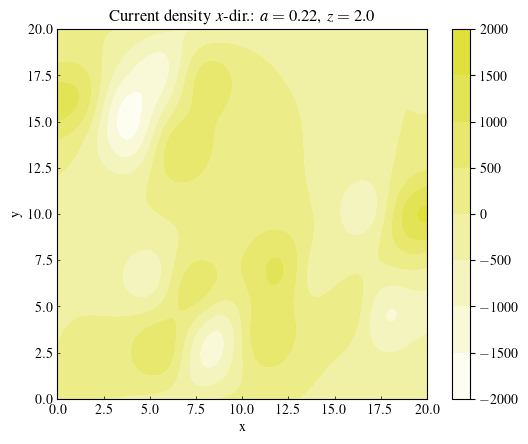

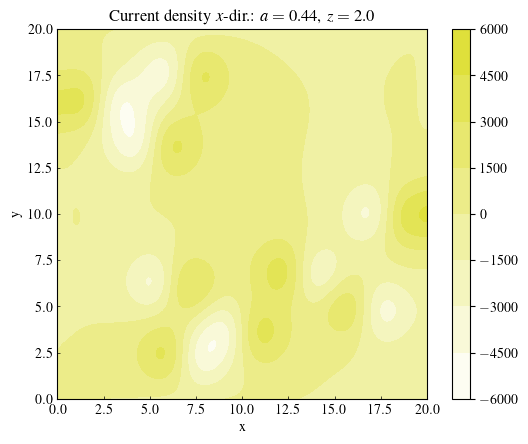

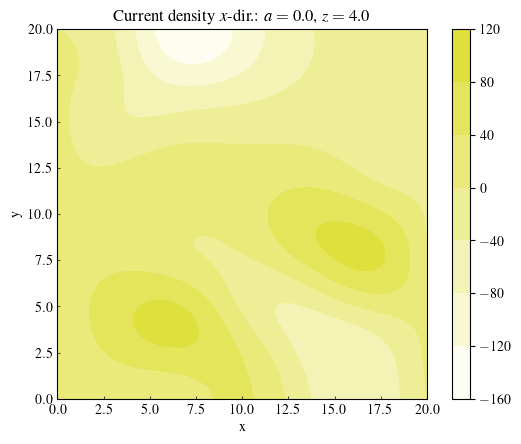

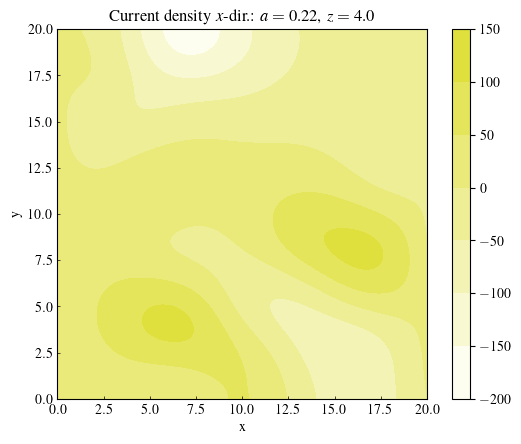

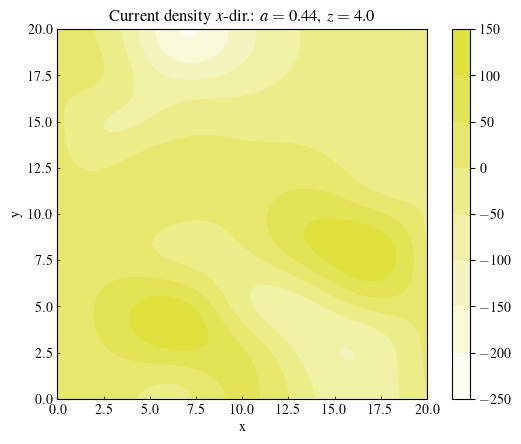

In [57]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_lff.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $x$-dir.: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jx_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs1.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $x$-dir.: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jx_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs2.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz,1],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $x$-dir.: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jx_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

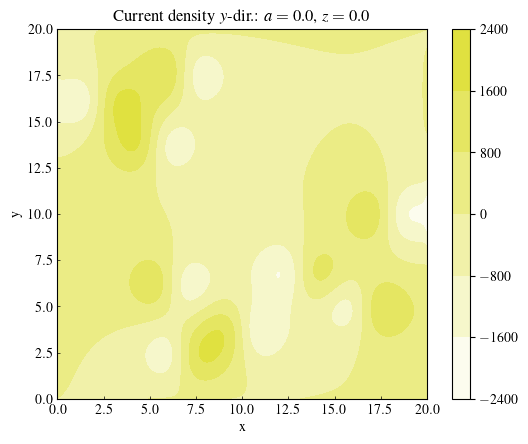

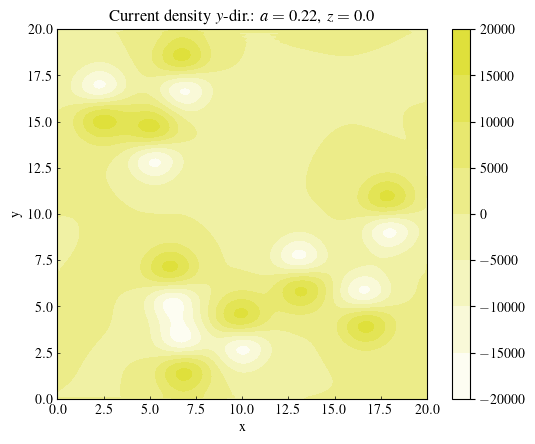

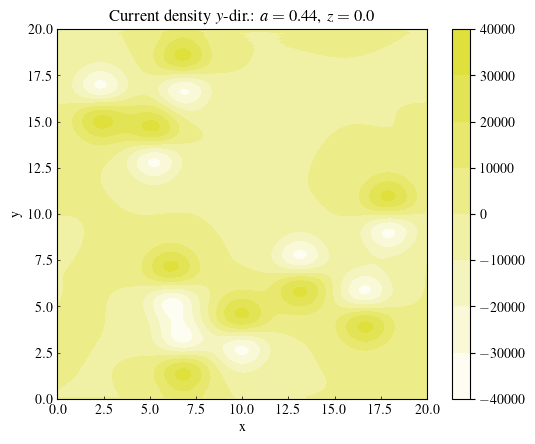

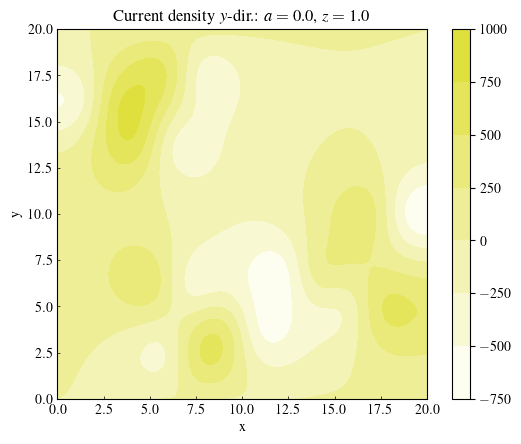

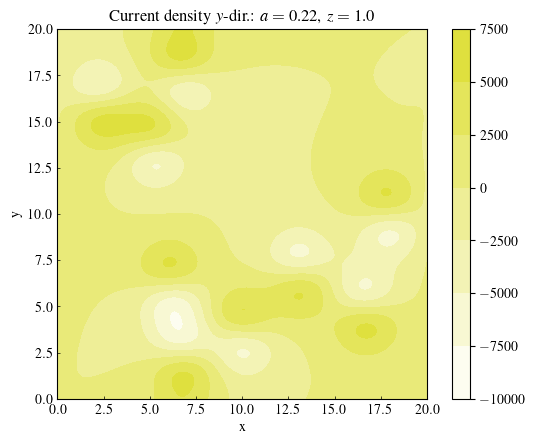

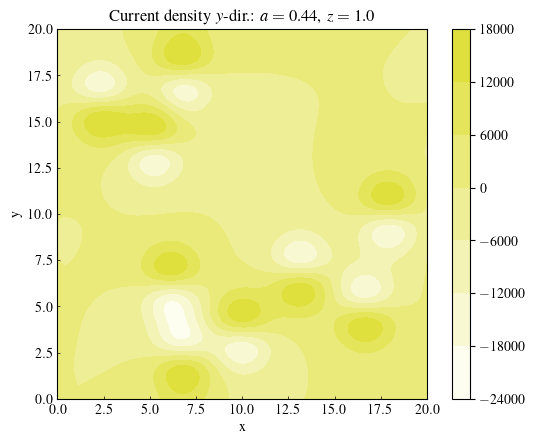

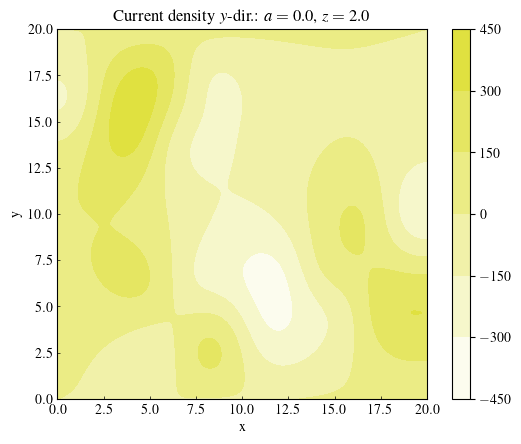

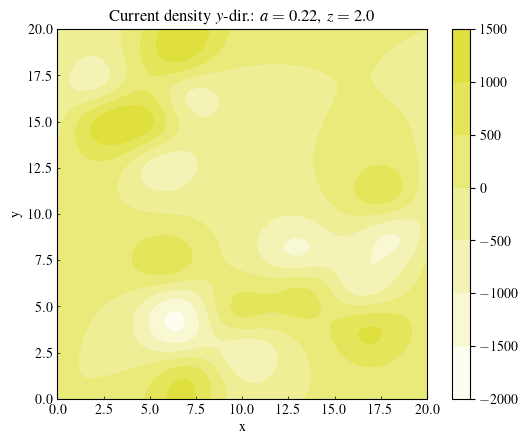

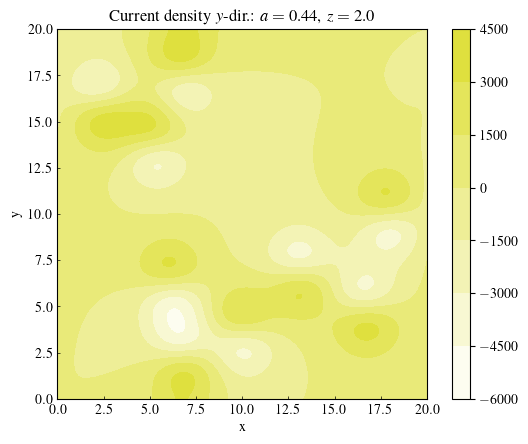

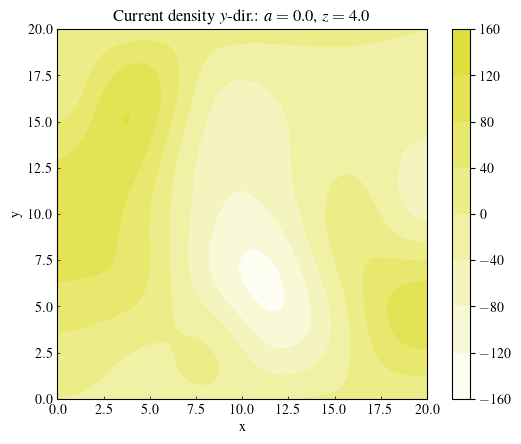

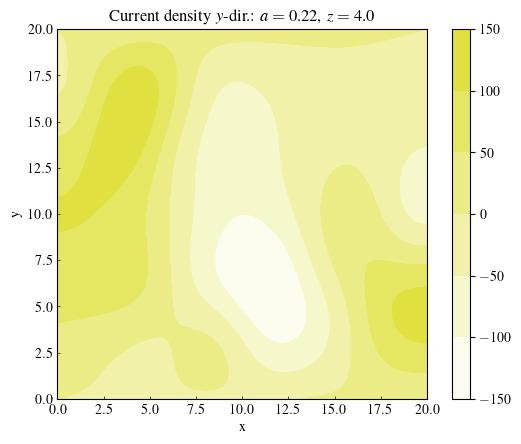

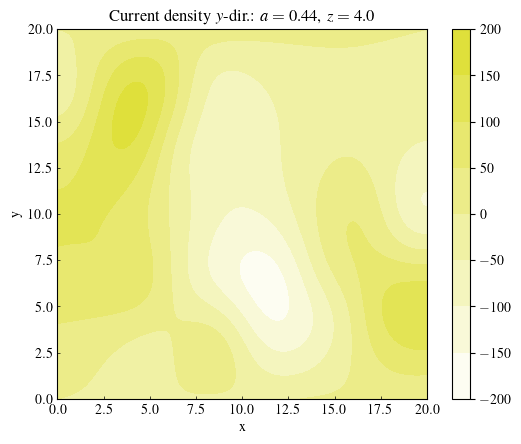

In [60]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_lff.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $y$-dir.: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jy_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs1.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz,0],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $y$-dir.: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jy_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs2.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz,0],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $y$-dir.: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jy_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [50]:
ErrormapL = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-F1535C
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c7),
    ),
)

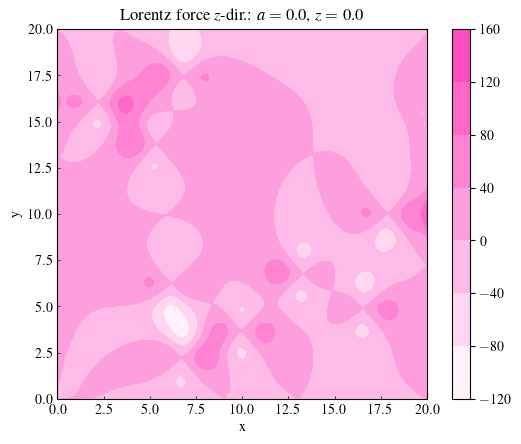

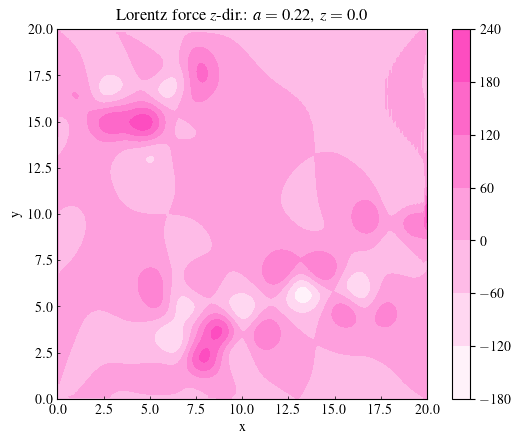

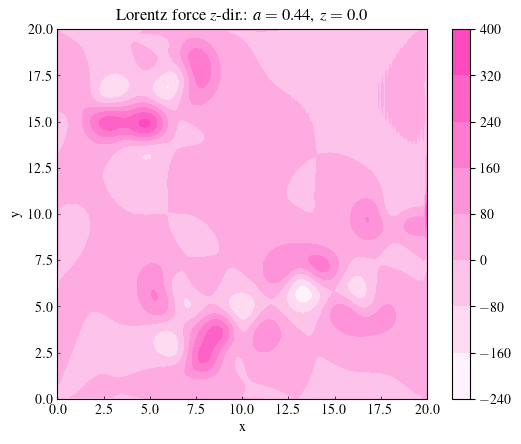

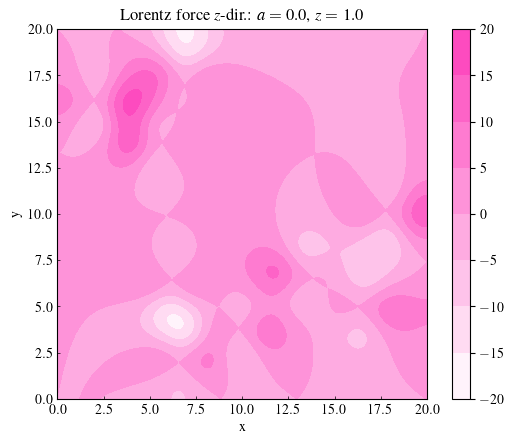

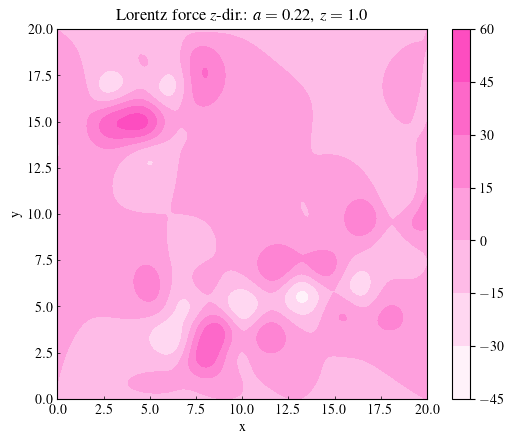

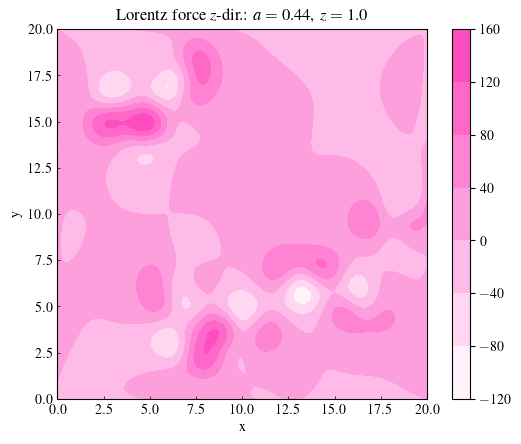

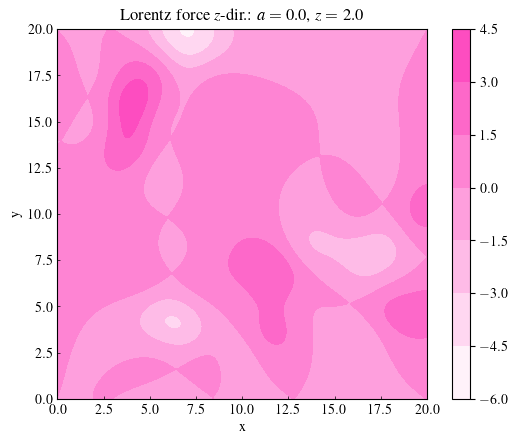

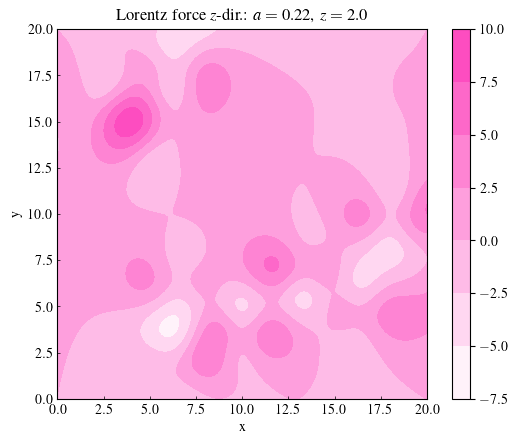

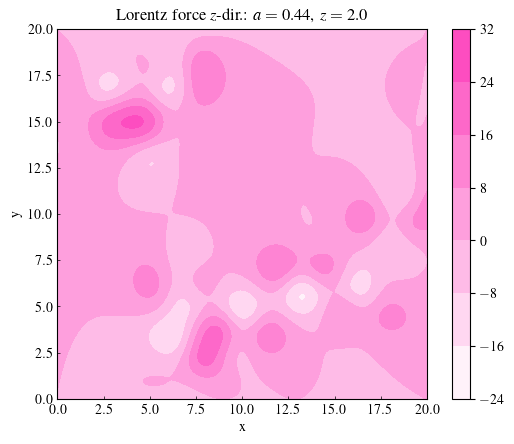

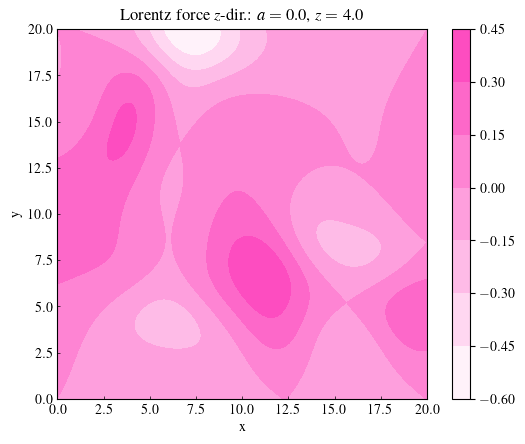

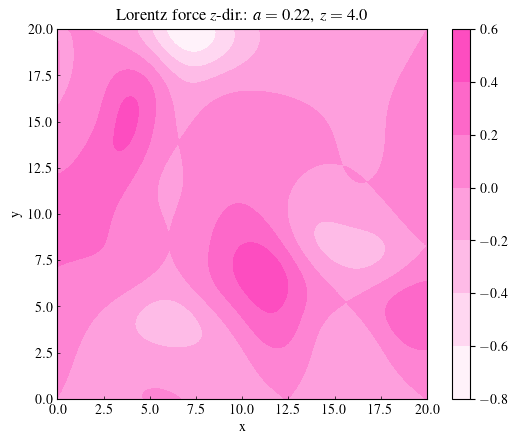

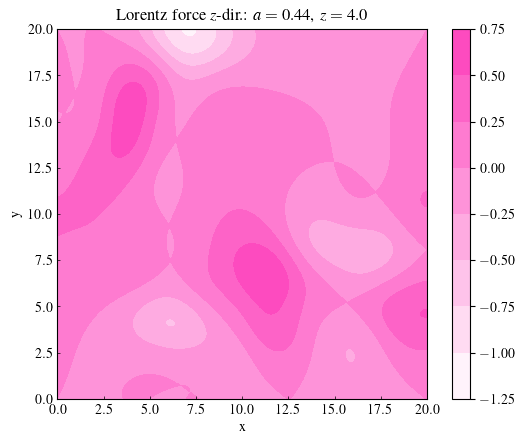

In [56]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_lff.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $z$-dir.: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfz_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs1.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $z$-dir.: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfz_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs2.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $z$-dir.: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfz_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

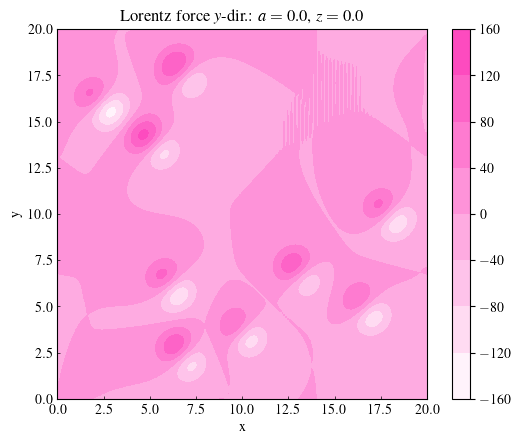

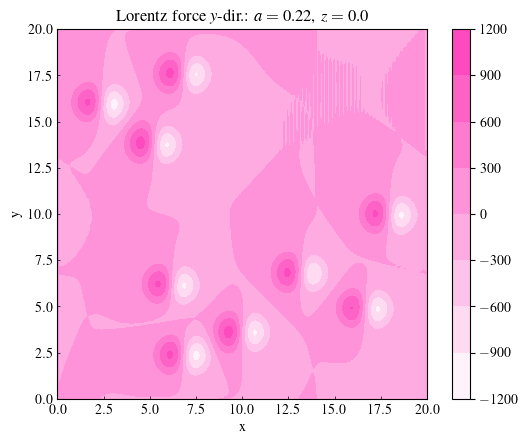

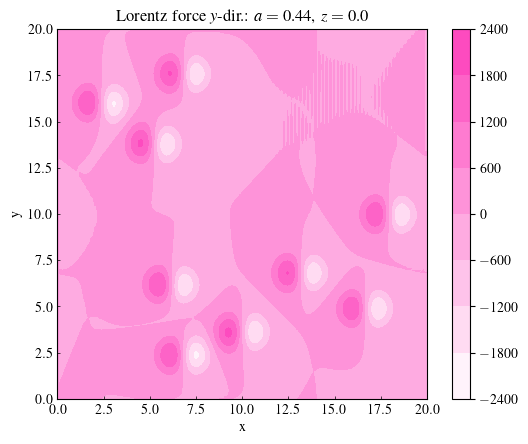

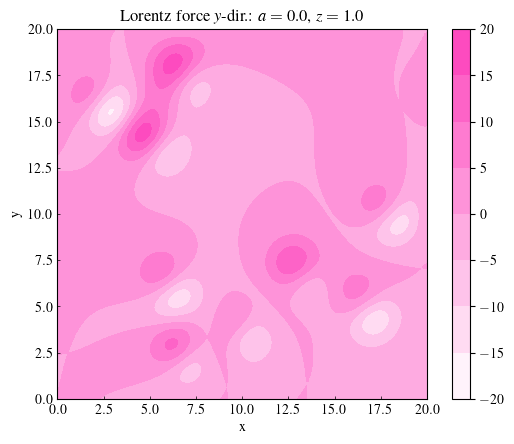

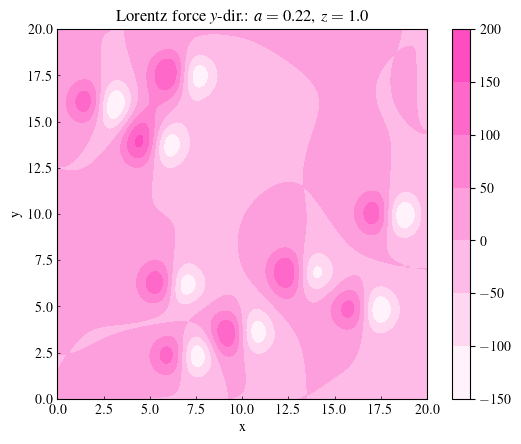

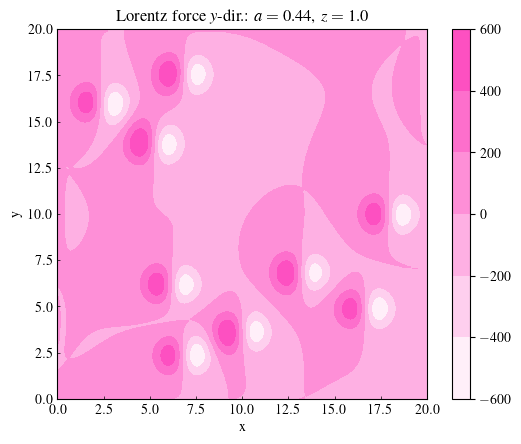

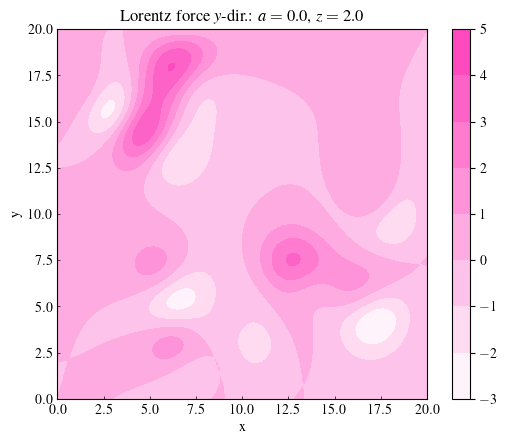

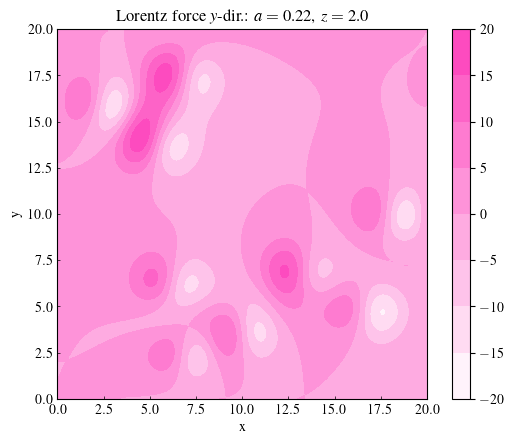

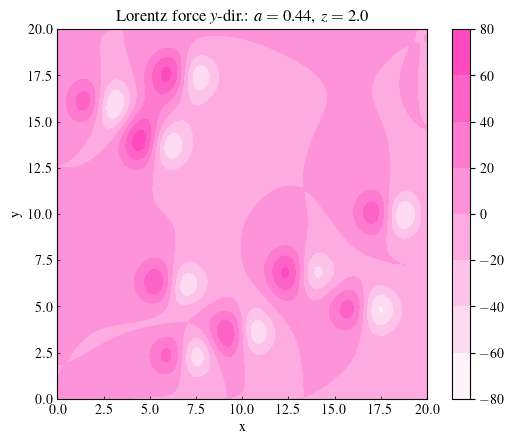

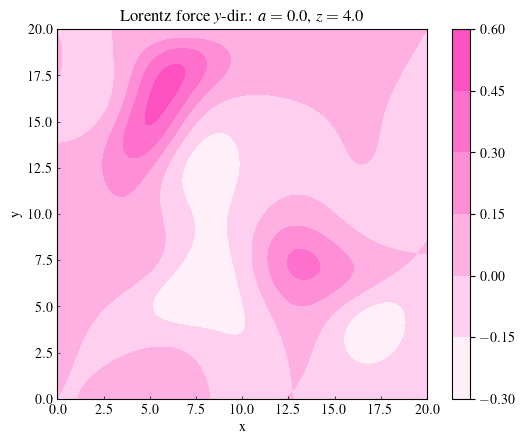

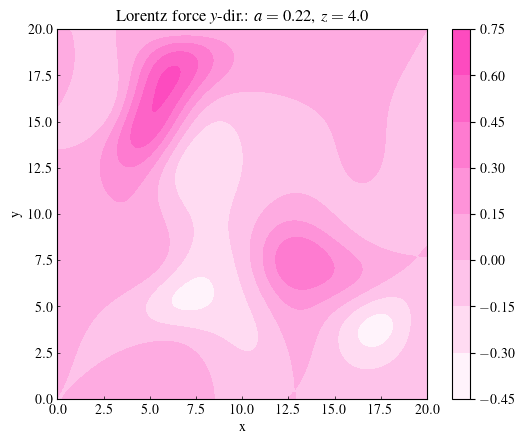

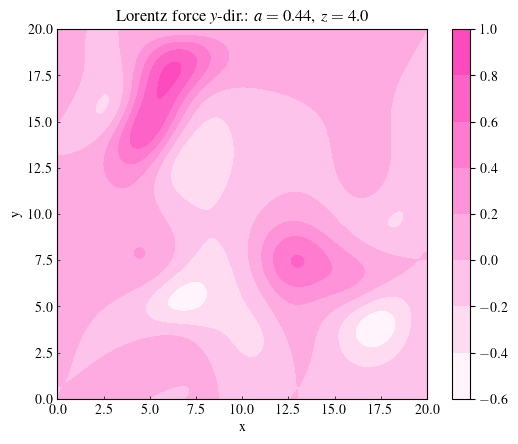

In [59]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_lff.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $y$-dir.: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfy_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs1.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $y$-dir.: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfy_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs2.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $y$-dir.: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfy_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

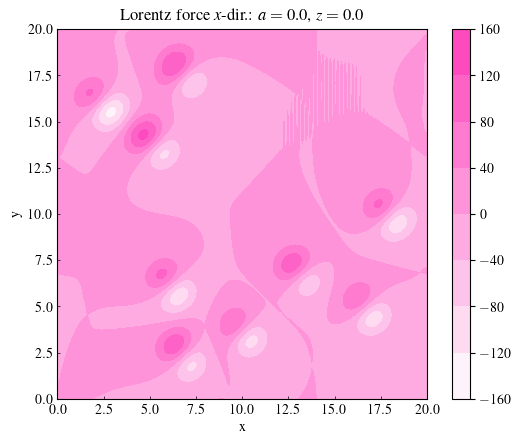

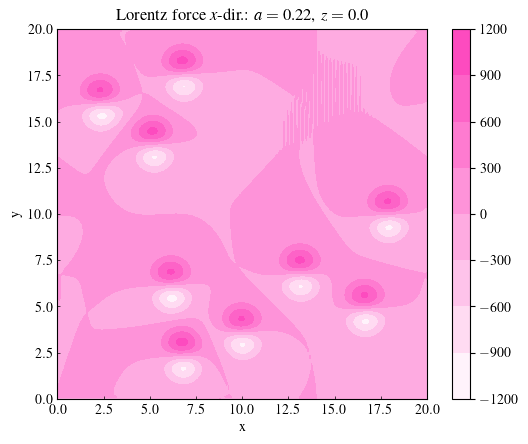

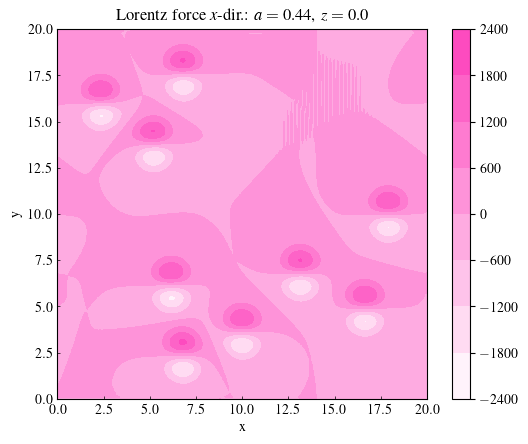

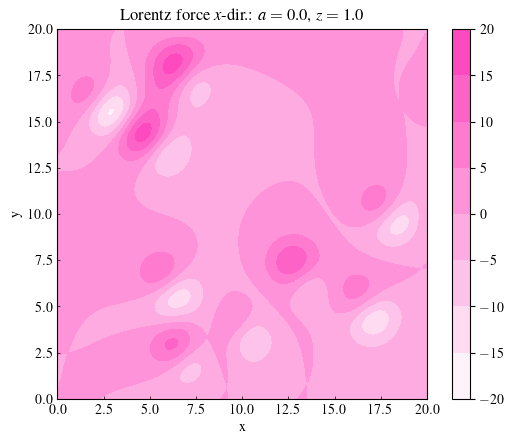

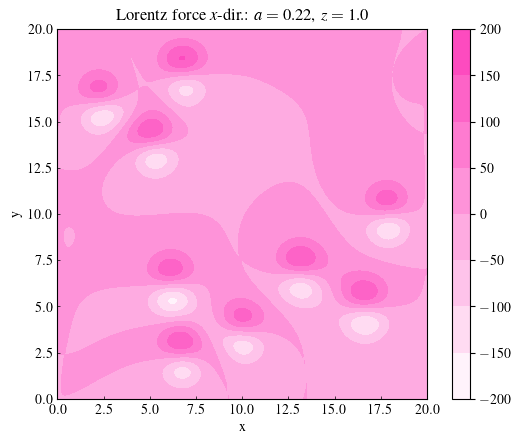

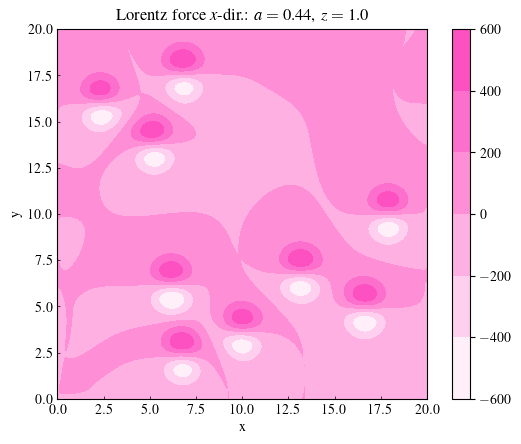

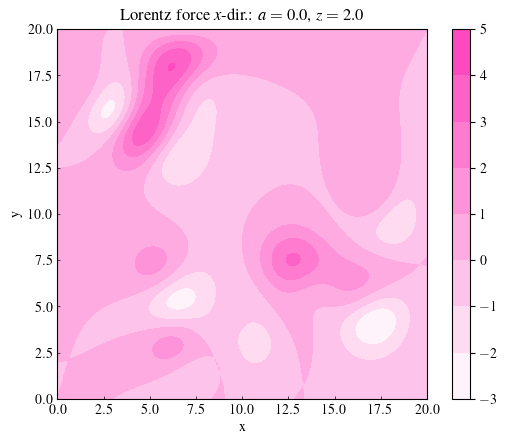

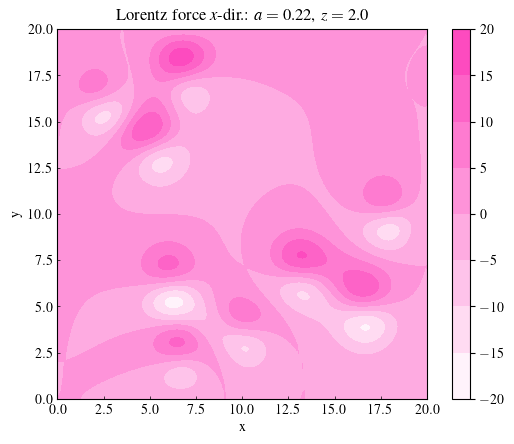

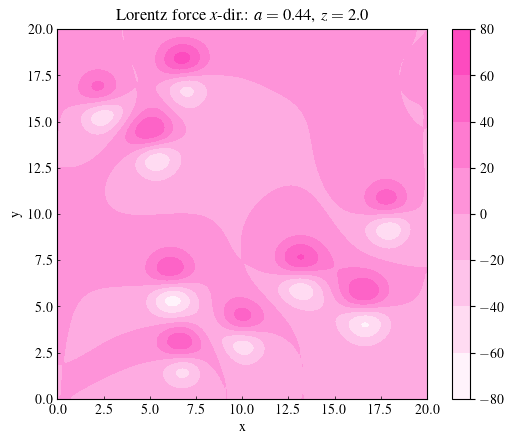

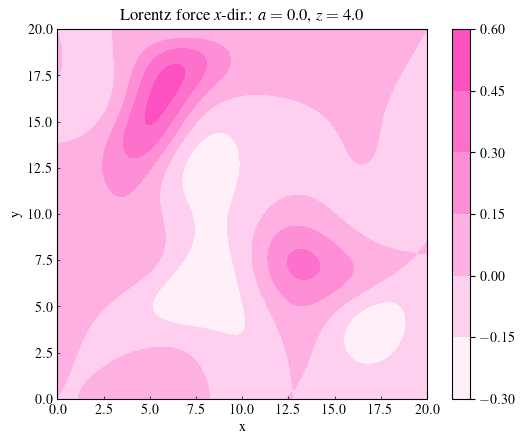

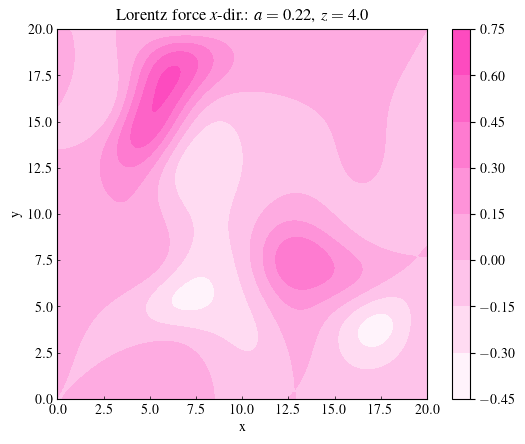

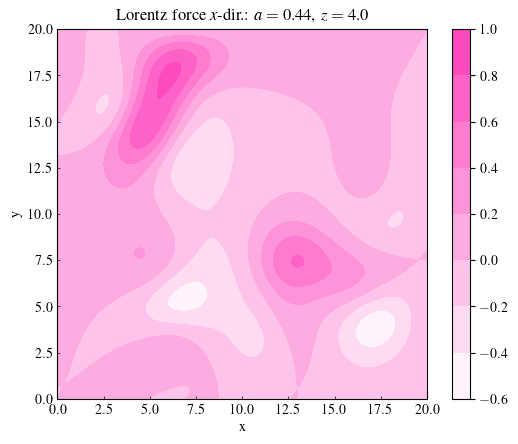

In [61]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_lff.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $x$-dir.: $a =$ "
        + str(alff)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfx_" + str(alff) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs1.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $x$-dir.: $a =$ "
        + str(amhs1)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfx_" + str(amhs1) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3d_mhs2.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $x$-dir.: $a =$ "
        + str(amhs2)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfx_" + str(amhs2) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()